In [5]:
using Revise
using BilevelTrajOpt

using RigidBodyDynamics
using Plots
gr(size=(500,500), html_output_format=:png);

In [6]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)
body = findbody(mechanism, "ball")
basejoint = joint_to_parent(body, mechanism)
floatingjoint = Joint(basejoint.name, frame_before(basejoint), frame_after(basejoint), QuaternionFloating{Float64}())
replace_joint!(mechanism, basejoint, floatingjoint)
position_bounds(floatingjoint) .= RigidBodyDynamics.Bounds(-100, 100)
velocity_bounds(floatingjoint) .= RigidBodyDynamics.Bounds(-100, 100)
μ = 0.5
motion_type = :xyz
point = Point3D(default_frame(findbody(mechanism, "floor")), [0.,0.,0.])
normal = FreeVector3D(default_frame(findbody(mechanism, "floor")), [0.,0.,1.])
hs = HalfSpace(point, normal)
floor = Obstacle(hs, μ, motion_type)
obstacles = [floor]
env = parse_contacts(mechanism, urdf, obstacles)
x0 = MechanismState(mechanism)
Δt = 0.005;

In [14]:
q0 = [1., 0., 0., 0., 0., 0., 0.005]
v0 = [0., 0., 0., 0.1, 0. , 0.]
N = 15

set_configuration!(x0, q0)
set_velocity!(x0, v0)
setdirty!(x0)

ctrl! = (u,t,x) -> u[:] .= 0.;

In [ ]:
println("Explicit Contacts")
traj_exp = BilevelTrajOpt.simulate_ipopt(x0,env,Δt,N,ctrl!,implicit_contact=false);

In [ ]:
println("Implicit Contacts")
traj_imp = BilevelTrajOpt.simulate_ipopt(x0,env,Δt,N,ctrl!,implicit_contact=true);

In [ ]:
println("Explicit Contacts")
traj_exp = BilevelTrajOpt.simulate_snopt(x0,env,Δt,N,ctrl!,implicit_contact=false);

In [17]:
println("Implicit Contacts")
traj_imp = BilevelTrajOpt.simulate_snopt(x0,env,Δt,N,ctrl!,implicit_contact=true);

Implicit Contacts
  0.286418 seconds (1.25 M allocations: 228.728 MiB, 21.28% gc time)
  0.282221 seconds (1.25 M allocations: 228.728 MiB, 20.77% gc time)
  0.294465 seconds (1.25 M allocations: 228.727 MiB, 18.71% gc time)
  0.279017 seconds (1.25 M allocations: 228.726 MiB, 18.90% gc time)
Finished successfully: optimality conditions satisfied
  0.280599 seconds (1.25 M allocations: 228.728 MiB, 21.24% gc time)
  0.273668 seconds (1.25 M allocations: 228.728 MiB, 19.64% gc time)
  0.278008 seconds (1.25 M allocations: 228.727 MiB, 21.33% gc time)
  0.273182 seconds (1.25 M allocations: 228.726 MiB, 19.90% gc time)
  0.272603 seconds (1.25 M allocations: 228.727 MiB, 19.31% gc time)
  0.288165 seconds (1.25 M allocations: 228.727 MiB, 20.71% gc time)
  0.290730 seconds (1.25 M allocations: 228.727 MiB, 19.08% gc time)
  0.285530 seconds (1.25 M allocations: 228.727 MiB, 20.96% gc time)
  0.287771 seconds (1.25 M allocations: 228.727 MiB, 20.17% gc time)
  0.274570 seconds (1.25 M all

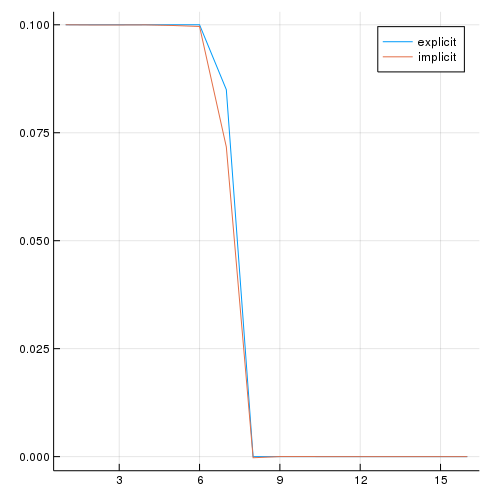

In [20]:
ts = cumsum([Δt for i in 1:N]);
j = 11
plot(traj_exp[j,:],label="explicit")
plot!(traj_imp[j,:],label="implicit")